Load datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

Feature Engineering

In [3]:
# Change the index to datetime
train_df.set_index(pd.DatetimeIndex(train_df['datetime']), inplace=True)

# Create new day and time related features
train_df['date'] = pd.DatetimeIndex(train_df['datetime']).strftime("%Y%m%d")
train_df['day'] = pd.DatetimeIndex(train_df['datetime']).strftime("%j")
train_df['month1'] = pd.DatetimeIndex(train_df['datetime']).strftime("%m")
train_df['month2'] = pd.DatetimeIndex(train_df['datetime']).strftime("%B")
train_df['year'] = pd.DatetimeIndex(train_df['datetime']).strftime("%Y")
train_df['hour'] = pd.DatetimeIndex(train_df['datetime']).strftime("%H")
train_df['dow1'] = pd.DatetimeIndex(train_df['datetime']).strftime("%w")
train_df['dow2'] = pd.DatetimeIndex(train_df['datetime']).strftime("%A")
train_df['woy'] = pd.DatetimeIndex(train_df['datetime']).strftime("%W")

# Create squared features
train_df['temp_sq'] = train_df['temp']**2
train_df['humidity_sq'] = train_df['humidity']**2

In [4]:
# Change the index to datetime
test_df.set_index(pd.DatetimeIndex(test_df['datetime']), inplace=True)

# Create new day and time related features
test_df['date'] = pd.DatetimeIndex(test_df['datetime']).strftime("%Y%m%d")
test_df['day'] = pd.DatetimeIndex(test_df['datetime']).strftime("%j")
test_df['month1'] = pd.DatetimeIndex(test_df['datetime']).strftime("%m")
test_df['month2'] = pd.DatetimeIndex(test_df['datetime']).strftime("%B")
test_df['year'] = pd.DatetimeIndex(test_df['datetime']).strftime("%Y")
test_df['hour'] = pd.DatetimeIndex(test_df['datetime']).strftime("%H")
test_df['dow1'] = pd.DatetimeIndex(test_df['datetime']).strftime("%w")
test_df['dow2'] = pd.DatetimeIndex(test_df['datetime']).strftime("%A")
test_df['woy'] = pd.DatetimeIndex(test_df['datetime']).strftime("%W")

# Create squared features
test_df['temp_sq'] = test_df['temp']**2
test_df['humidity_sq'] = test_df['humidity']**2

Exploratory Data Analysis

In [5]:
# Holiday and weekday indicators check out
train_df.groupby(['workingday','holiday','dow2'])['count'].agg('sum').unstack()

dow2                  Friday    Monday  Saturday    Sunday  Thursday  \
workingday holiday                                                     
0          0             NaN       NaN  311518.0  285546.0       NaN   
           1          6494.0   43911.0       NaN       NaN       NaN   
1          0        296010.0  251385.0       NaN       NaN  306401.0   

dow2                 Tuesday  Wednesday  
workingday holiday                       
0          0             NaN        NaN  
           1             NaN     7403.0  
1          0        291985.0   284823.0

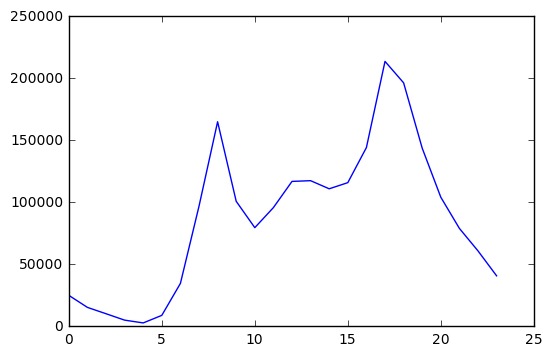

In [6]:
# Rentals by hour
by_hour = train_df.groupby(['hour'])['count'].agg('sum')
plt.plot(by_hour)
plt.show()


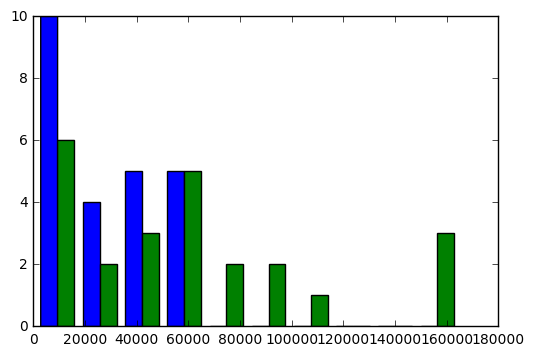

In [7]:
# Rentals by hour
by_hour = train_df.groupby(['hour','workingday'])['count'].agg('sum').unstack()
# by_hour
# plt.plot(data=by_hour, kind='bar', figsize=(8,4), width=0.8)
plt.hist(by_hour)
plt.show()

# by_hour.plot(kind='bar', figsize=(8,4), width=0.8);


In [10]:
train_data = train_df[\
    ['season','holiday','workingday','weather','temp','atemp','humidity',\
     'windspeed','woy','dow1','hour']].values
train_labels = train_df['count']
test_data = test_df[\
    ['season','holiday','workingday','weather','temp','atemp','humidity',\
     'windspeed','woy','dow1','hour']].values     

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 3)

dt.fit(train_data, train_labels)

test_predict = pd.DataFrame(dt.predict(test_data))
test_predict.to_csv("predictions.csv", sep='\t')

test_df['datetime'].to_csv("datetime.csv", sep='\t')